![logo](https://eventos.galileo.edu/images/logo-noslogan.png)

### Postgrado en Analisis y Prediccion de Datos

# *Curso*: Ciencia de Datos en Python

![title](imagenproyecto.png)

---

![title](paso1.png)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn


---

![title](paso2.png)

In [4]:
# Carga de datos usando la función "Load" the NumPy

setOriginal = np.load('proyecto_training_data.npy')

In [5]:
setOriginal

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [6]:
# Determinar la Dimension

setOriginal.ndim

2

In [7]:
# Determinar Shape del DataSet

setOriginal.shape

(1460, 6)

In [8]:
# Determinar Length del array

lentotal = len(setOriginal)

lentotal

1460

In [9]:
# Slicing Set Original en 80% Entrenamiento y 20% Validacion

entrenamiento, validacion = np.split(setOriginal,[int(len(setOriginal)*0.8)])

print(f'La longitud del set de entrenamiento es de: {len(entrenamiento)} equivalente al {(len(entrenamiento)/lentotal)*100}%\n')

print(f'La longitud del set de validacion es de: {len(validacion)} equivalente al {(len(validacion)/lentotal)*100}%')

La longitud del set de entrenamiento es de: 1168 equivalente al 80.0%

La longitud del set de validacion es de: 292 equivalente al 20.0%


---

![title](paso3.png)

### Información sobre el set de datos

El dataset contiene una variable dependiente y cinco variables independientes.

- Y = El valor de la propiedad en venta en $

- X1 = Calidad en general de la vivienda


|Nota|Descripción|
|---|--------|
|10|Very Excellent|
|9|	Excellent|
|8|	Very Good|
|7|	Good|
|6|	Above Average|
|5|	Average|
|4|	Below Average|
|3|	Fair|
|2|	Poor|
|1|	Very Poor|

- X2 = 1stFlrSF, pies cuadrados primer nivel

- X3 = TotRmsAbvGrd, total de cuartos

- X4 = YearBuilt: Fecha de construcción original

- X5 = LotFrontage, pies lineales de calle



In [10]:
# Para cada variable en el dataset calcular (media, valor máximo, valor mínimo, rango desviación estándar)

### Para el análisis exploratorio se utilizará Pandas.

In [11]:
df = pd.DataFrame(entrenamiento, columns=['Y','X1','X2','X3','X4','X5'])
df.head()
media = df.mean(axis=0)
media

Y     180590.277397
X1         6.101027
X2      1156.323630
X3         6.485445
X4      1971.451199
X5        69.946985
dtype: float64

In [12]:
# Verificando si el set de datos contiene NaN

print(f'El set de datos contiene valores NaN: {df.isnull().values.any()}')

El set de datos contiene valores NaN: True


In [13]:
# Eliminando las filas que contengan NaN

df = df.dropna()
df.head()


,Y,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Generación de resumen de estadísticos para cada variable por medio de una función

In [14]:
def estadisticos(x):

    for column in df:

        print(f'Estadisticos de: {column}\n')
        print(f'La media es: {round(df[column].mean(),4)}')
        print(f'El valor maximo es: {df[column].max()}')
        print(f'El valor minimo es: {df[column].min()}')
        print(f'El rango es: {df[column].max()-df[column].min()}')
        print(f'La desviacion estandar es: {round(df[column].std(),4)}\n')
        print('---------------------------------------------------------')
    
estadisticos(df)
    

Estadisticos de: Y

La media es: 180994.2464
El valor maximo es: 755000.0
El valor minimo es: 34900.0
El rango es: 720100.0
La desviacion estandar es: 83331.2669

---------------------------------------------------------
Estadisticos de: X1

La media es: 6.1247
El valor maximo es: 10.0
El valor minimo es: 1.0
El rango es: 9.0
La desviacion estandar es: 1.4183

---------------------------------------------------------
Estadisticos de: X2

La media es: 1155.6289
El valor maximo es: 3138.0
El valor minimo es: 334.0
El rango es: 2804.0
La desviacion estandar es: 372.5885

---------------------------------------------------------
Estadisticos de: X3

La media es: 6.499
El valor maximo es: 14.0
El valor minimo es: 2.0
El rango es: 12.0
La desviacion estandar es: 1.6182

---------------------------------------------------------
Estadisticos de: X4

La media es: 1970.6663
El valor maximo es: 2010.0
El valor minimo es: 1875.0
El rango es: 135.0
La desviacion estandar es: 31.543

---------------

---

![title](paso4.png)

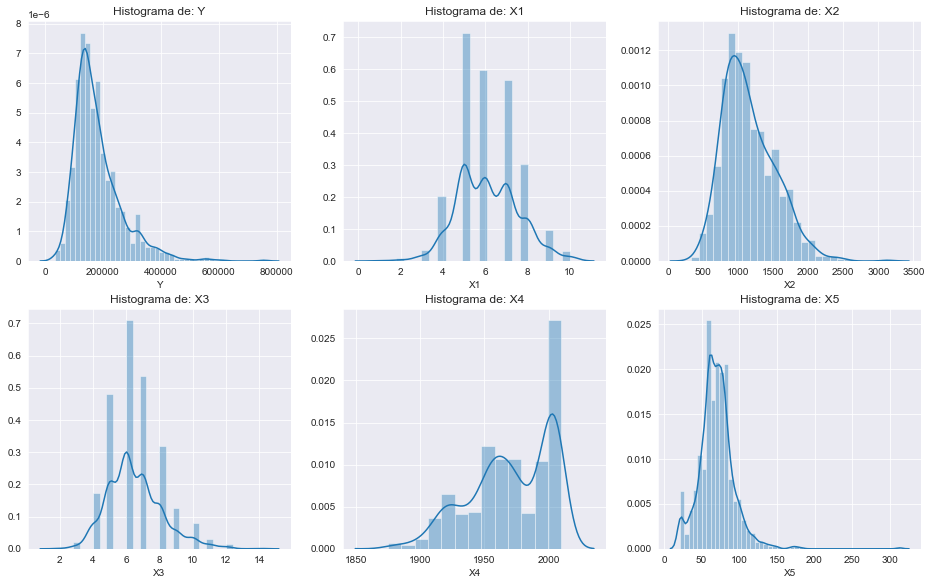

In [15]:

a, b, c = 3, 3, 1

fig = plt.figure(figsize=(16,15))

sns.set_style("darkgrid")

for i in df:
    plt.subplot(a,b,c)
    plt.title(f'Histograma de: {i}')
    sns.distplot(df[i])
    c = c+1

plt.show()

---

![title](paso5.png)

In [16]:
# Calcular el coeficiente de correlación entre X y Y

vardep = df['Y']

for i in df.columns[1:]:
    varind = df[i]
    corre = vardep.corr(varind)
    print(f'El coeficiente de correlación entre {df.columns[0]} y {i} es de: {round(corre,6)}\n')
    

El coeficiente de correlación entre Y y X1 es de: 0.808659

El coeficiente de correlación entre Y y X2 es de: 0.640142

El coeficiente de correlación entre Y y X3 es de: 0.574866

El coeficiente de correlación entre Y y X4 es de: 0.548301

El coeficiente de correlación entre Y y X5 es de: 0.363292



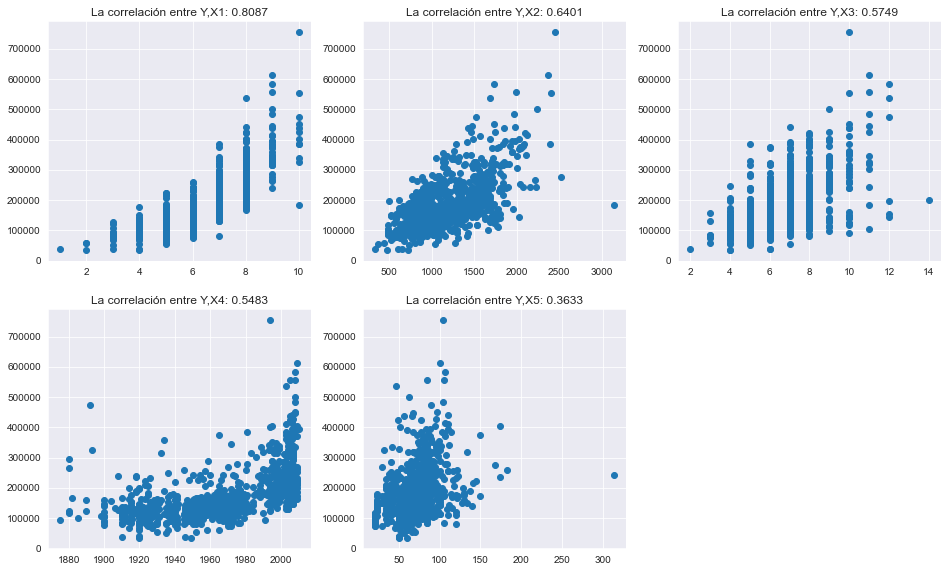

In [17]:
a, b, c = 3, 3, 1

fig = plt.figure(figsize=(16,15))

depen = df.iloc[:,0]

for i in df.columns[1:]:
    plt.subplot(a,b,c)
    plt.scatter(df[i],depen)
    corr = depen.corr(df[i])
    plt.title(f'La correlación entre {df.columns[0]},{i}: {round(corr,4)}')
    c = c+1
plt.show()


---

![title](paso6.png)

In [18]:
# Eliminar filas que contengan NaN

entrenamiento2 = entrenamiento[~np.isnan(entrenamiento).any(axis=1)]

In [19]:
# Separar set de entrenamiento en y & x's

ytrain = entrenamiento2[:,0]

xtrain = entrenamiento2[:,1:]


In [513]:
# Creacion de funcion para entrenar un modelo de regresion lineal

def entrenarmodelo(x,y,epochs,imprimir_error_cada,learning_rate):
    
    #Creacion de matriz con el vector x y una segunda columna con unos
    matriz = np.array((x,np.ones_like(x)))
    #print(matriz)
    
    #Inicializacion de los parametros iniciales β0 y β1     
    parametros = np.array([1.,2.])
    #print(parametros)
    
    #Inicializacion vector de errores
    error_vect = np.zeros(epochs)
    
    #Almacenamiento de los datos del modelo
    dic_modelo = {}
    dic_predict = {}
    
    N = len(y)
    
    #iteraciones
    
    for i in range(epochs):
        
        #Calculo de Y prediccion
        y_predict = np.dot(parametros,matriz)
        dic_predict[i] = y_predict
        #print(y_predict)

        
        #Calculo de la funcion de costo
        #costo = 0.5 * np.mean((y - y_predict)**2)
        costo = (1/2*N)*(np.sum((y - y_predict)**2))
        
        #Almacenar error de cada iteracion
        error_vect[i] = costo
        
        #Calculo del gradiente
        gradiente = np.array([(1/N)*(np.sum((y_predict - y)*x)),(1/N)*(np.sum(y_predict-y))])
        #print(f'este es el gradiente {gradiente}')
        
        #Actualizacion de parametros
        #print(f'parametros inciales {parametros}')
        parametros = parametros - (learning_rate*gradiente)
        #print(f'parametros actualizados {parametros}')
        #print(learning_rate)
        #print(learning_rate*gradiente)
        
        #Guardar los resultados
        dic_modelo[i]=parametros
        
        #Imprimir iteracion y costo
        if i%imprimir_error_cada == 0:
            print(f'Iteracion # {i} y su funcion de costo es: {costo:,.2f}\n')
            #print(parametros)
            #print(parametros)
            #print(dic_modelo[i])
        
    return dic_modelo, error_vect, dic_predict
    

In [529]:
# Funcion para visualizar como cambia el error en el tiempo

def graficaerror(costos):
    fig = plt.figure(figsize=(16,8))
    plt.plot(costos)
    plt.xlabel("Numero de iteraciones")
    plt.ylabel("Valor del error")
    plt.title("Funcion de costo")
    plt.show()
    

In [426]:
# Funcion para visualizar como evoluciona el modelo en el tiempo

def graficamodelo(x,y,modelo,n):
    fig = plt.figure(figsize=(16,8))
    plt.scatter(x,y)
    plt.xlabel("X1")
    plt.ylabel("Precio Casas")
    plt.title("Modelos de Regresion")

    maximo = len(modelo.keys())

    for i in range(0, maximo, n):
        plt.plot(x,modelo[i])
        plt.annotate(f'n: {i}',(np.max(x),np.max(modelo[i])))
    

### Entrenando Modelo para variable X1 - OverallQual: Overall material and finish quality, rates the overall material and finish of the house -

In [530]:
modeloX1, costos1, ypredict1 = entrenarmodelo(xtrain[:,0],ytrain,100,10,0.001)

Iteracion # 0 y su funcion de costo es: 18,366,670,221,590,872.00

Iteracion # 10 y su funcion de costo es: 8,836,798,806,375,998.00

Iteracion # 20 y su funcion de costo es: 4,665,643,280,509,913.00

Iteracion # 30 y su funcion de costo es: 2,839,862,121,429,586.50

Iteracion # 40 y su funcion de costo es: 2,040,592,079,587,713.50

Iteracion # 50 y su funcion de costo es: 1,690,600,120,404,806.50

Iteracion # 60 y su funcion de costo es: 1,537,245,967,150,369.00

Iteracion # 70 y su funcion de costo es: 1,469,955,370,504,418.00

Iteracion # 80 y su funcion de costo es: 1,440,332,782,477,161.50

Iteracion # 90 y su funcion de costo es: 1,427,196,697,518,036.50



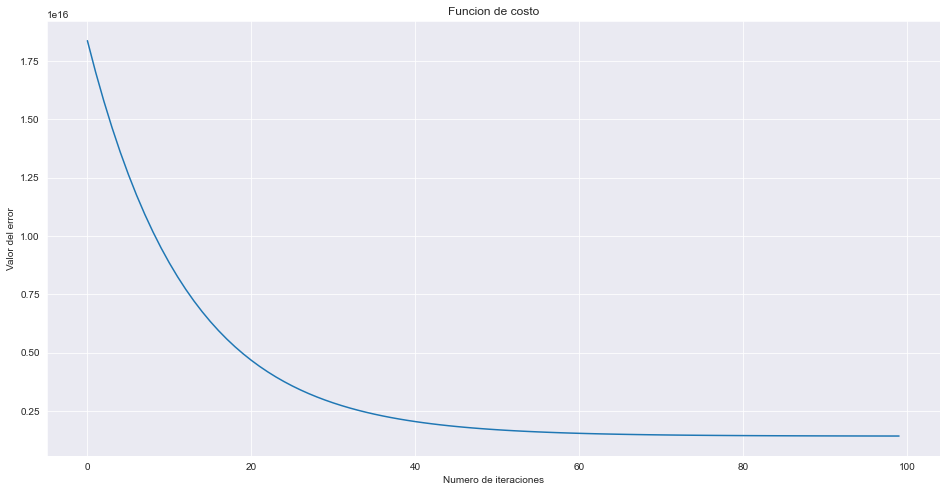

In [531]:
graficaerror(costos1)

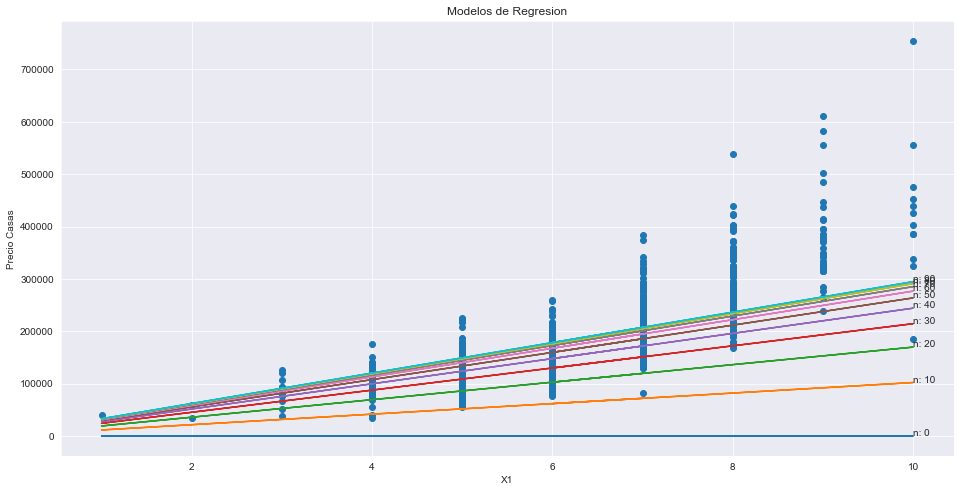

In [532]:
graficamodelo(xtrain[:,0],ytrain,ypredict1,10)

In [541]:
ultimo = len(modeloX1)-1

print(f'Los parametros de la ultima iteracion son: {modeloX1[ultimo]}')

Los parametros de la ultima iteracion son: [29337.78888556  3972.6918724 ]


### Entrenando Modelo para variable X2 - 1stFlrSF: First Floor square feet -

In [535]:
modeloX2, costos2, ypredict2 = entrenarmodelo(xtrain[:,1],ytrain,100,20,0.00000002)

Iteracion # 0 y su funcion de costo es: 18,156,526,468,561,676.00

Iteracion # 20 y su funcion de costo es: 6,814,293,700,064,420.00

Iteracion # 40 y su funcion de costo es: 3,388,020,714,670,189.50

Iteracion # 60 y su funcion de costo es: 2,353,008,754,113,490.50

Iteracion # 80 y su funcion de costo es: 2,040,351,308,433,512.50



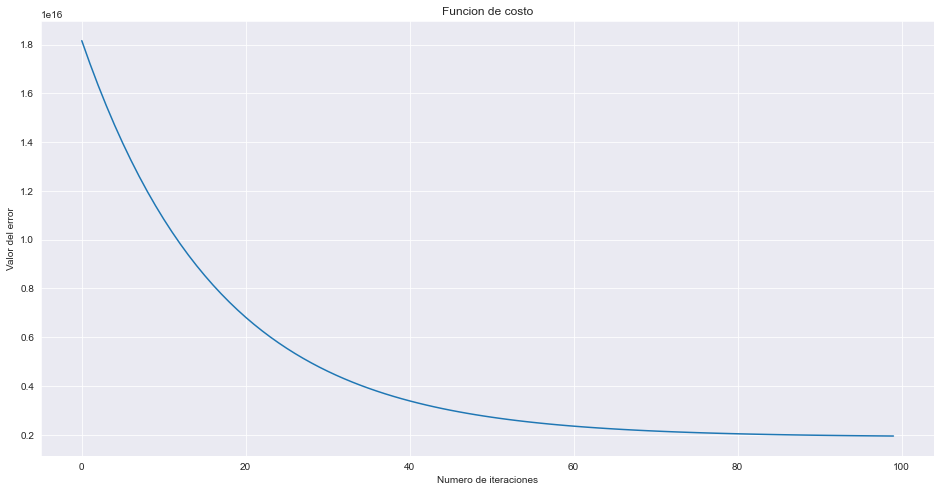

In [536]:
graficaerror(costos2)

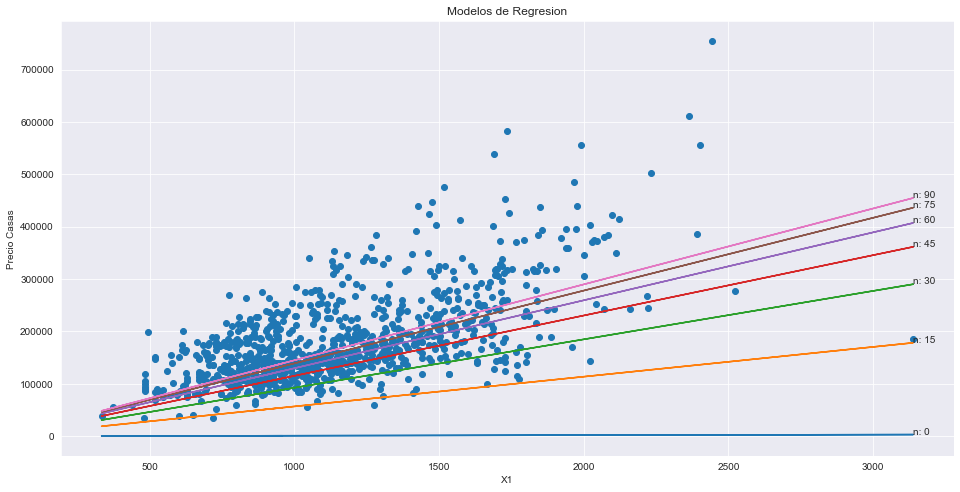

In [537]:
graficamodelo(xtrain[:,1],ytrain,ypredict2,15)

In [540]:
ultimo = len(modeloX2)-1

print(f'Los parametros de la ultima iteracion son: {modeloX2[ultimo]}')

Los parametros de la ultima iteracion son: [147.6113987    2.11785619]


## Usar scikit-learn para entrenar un modelo de regresion lineal

### Modelo Regresion Lineal para X1

In [410]:
from sklearn.linear_model import LinearRegression

Y = ytrain.reshape(-1,1)

X1 = xtrain[:,0].reshape(-1,1)

X2 = xtrain[:,1].reshape(-1,1)

In [411]:
sk_x1 =LinearRegression()
sk_x1.fit(X1,Y)

LinearRegression()

In [412]:
sk_x1.coef_, sk_x1.intercept_

(array([[47513.34854182]]), array([-110012.66591309]))

### RMSE

In [418]:
from sklearn import metrics
RMSE = metrics.mean_squared_error(Y,sk_x1.predict(X1))
print(f'RMSE es de {RMSE:,.2f}')

RMSE es de 2,400,651,647.29


### Modelo Regresion Lineal para X2

In [420]:
sk_x2 =LinearRegression()
sk_x2.fit(X2,Y)

LinearRegression()

In [421]:
sk_x2.coef_, sk_x2.intercept_

(array([[143.17087973]]), array([15541.84037355]))

### RMSE

In [422]:
from sklearn import metrics
RMSE = metrics.mean_squared_error(Y,sk_x2.predict(X1))
print(f'RMSE es de {RMSE:,.2f}')

RMSE es de 33,994,687,290.67


In [178]:
np.set_printoptions(suppress=True)